<a href="https://colab.research.google.com/github/lawchris96/portfolio/blob/main/Stock_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/lawchris96/datascienceclass/main/EODAAPL.csv')
df.head()

,Date,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume
0,2017-12-28,171.00,171.850,170.480,171.08,16480187.0,0.0,1.0,41.075401,41.279577,40.950493,41.094617,65920748.0
1,2017-12-27,170.10,170.780,169.710,170.60,21498213.0,0.0,1.0,40.859214,41.022555,40.765534,40.979318,85992852.0
2,2017-12-26,170.80,171.470,169.679,170.57,33185536.0,0.0,1.0,41.027359,41.188298,40.758087,40.972112,132742144.0
3,2017-12-22,174.68,175.424,174.500,175.01,16349444.0,0.0,1.0,41.959363,42.138077,41.916125,42.038631,65397776.0
4,2017-12-21,174.17,176.020,174.100,175.01,20949896.0,0.0,1.0,41.836857,42.281240,41.820043,42.038631,83799584.0


In [3]:
df.isnull().sum() # check for missing values

Date          0
Open          0
High          0
Low           0
Close         0
Volume        0
Dividend      0
Split         0
Adj_Open      0
Adj_High      0
Adj_Low       0
Adj_Close     0
Adj_Volume    0
dtype: int64

In [4]:
df.shape # the dataset has 1090 rows and 13 columns

(1090, 13)

In [5]:
df.corr()

,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume
Open,1.000000,0.999948,0.999935,0.999866,-0.547597,0.088894,-0.019234,-0.534445,-0.537418,-0.531829,-0.534399,0.502054
High,0.999948,1.000000,0.999941,0.999944,-0.545893,0.088582,-0.019154,-0.535283,-0.538038,-0.532575,-0.534990,0.504125
Low,0.999935,0.999941,1.000000,0.999949,-0.550156,0.089065,-0.019259,-0.533844,-0.536724,-0.530960,-0.533517,0.498174
Close,0.999866,0.999944,0.999949,1.000000,-0.548315,0.088610,-0.019044,-0.534448,-0.537173,-0.531552,-0.533903,0.500617
Volume,-0.547597,-0.545893,-0.550156,-0.548315,1.000000,-0.061064,0.054382,0.085888,0.095572,0.071723,0.081938,0.337092
Dividend,0.088894,0.088582,0.089065,0.088610,-0.061064,1.000000,-0.002708,-0.050353,-0.051215,-0.050306,-0.051095,0.002395
Split,-0.019234,-0.019154,-0.019259,-0.019044,0.054382,-0.002708,1.000000,-0.024993,-0.024640,-0.025124,-0.023978,0.029564
Adj_Open,-0.534445,-0.535283,-0.533844,-0.534448,0.085888,-0.050353,-0.024993,1.000000,0.999528,0.999416,0.998987,-0.549990
Adj_High,-0.537418,-0.538038,-0.536724,-0.537173,0.095572,-0.051215,-0.024640,0.999528,1.000000,0.999278,0.999526,-0.544404
Adj_Low,-0.531829,-0.532575,-0.530960,-0.531552,0.071723,-0.050306,-0.025124,0.999416,0.999278,1.000000,0.999558,-0.560073


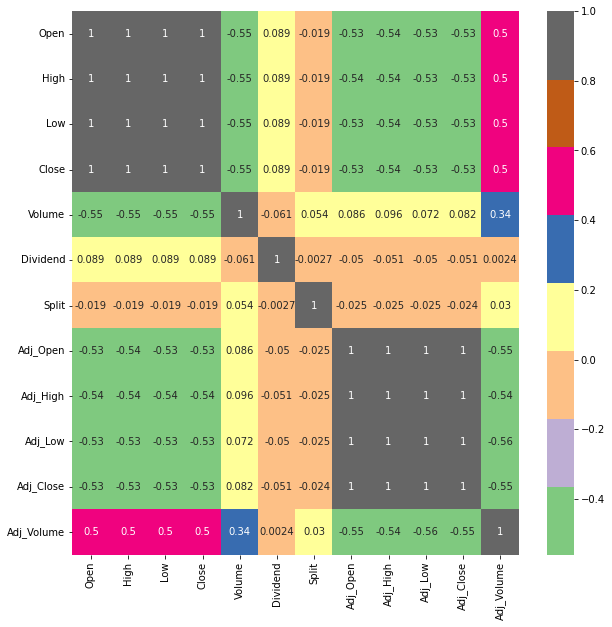

In [6]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, cmap=plt.cm.Accent)
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8365f0e130>,
      dtype=object)

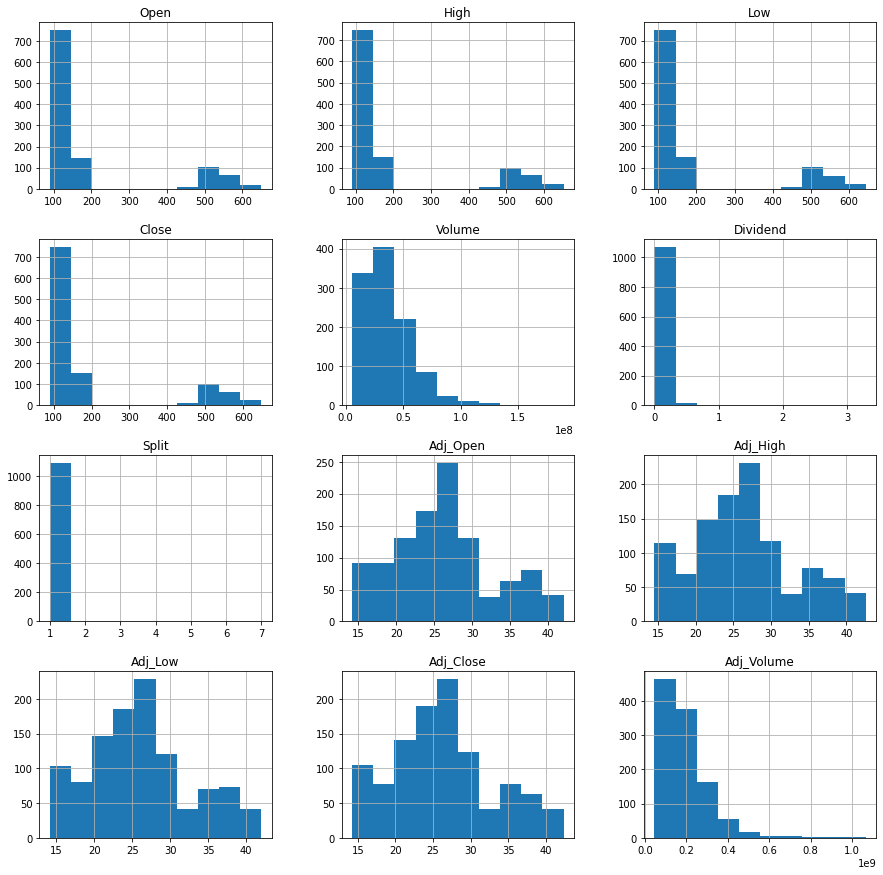

In [7]:
df.hist(figsize=(15,15)) # display the histogram for all the columns in the dataset

In [8]:
# feature engineering
# create a nbew columns based on the existing columns, high low percentage, percentage of change
df['HL_PCT']=(df['Adj_High']-df['Adj_Low'])/df['Adj_Close']*100.0
df['PCT_change']=(df['Adj_Close']-df['Adj_Open'])/df['Adj_Open']*100.0

In [9]:
df.head()

,Date,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume,HL_PCT,PCT_change
0,2017-12-28,171.00,171.850,170.480,171.08,16480187.0,0.0,1.0,41.075401,41.279577,40.950493,41.094617,65920748.0,0.800795,0.046784
1,2017-12-27,170.10,170.780,169.710,170.60,21498213.0,0.0,1.0,40.859214,41.022555,40.765534,40.979318,85992852.0,0.627198,0.293945
2,2017-12-26,170.80,171.470,169.679,170.57,33185536.0,0.0,1.0,41.027359,41.188298,40.758087,40.972112,132742144.0,1.050009,-0.134660
3,2017-12-22,174.68,175.424,174.500,175.01,16349444.0,0.0,1.0,41.959363,42.138077,41.916125,42.038631,65397776.0,0.527970,0.188917
4,2017-12-21,174.17,176.020,174.100,175.01,20949896.0,0.0,1.0,41.836857,42.281240,41.820043,42.038631,83799584.0,1.097080,0.482287


In [10]:
# create a new data frame
df1 = df[['Adj_Close', 'Dividend', 'Adj_Volume', 'HL_PCT', 'PCT_change']]
df1.head()

,Adj_Close,Dividend,Adj_Volume,HL_PCT,PCT_change
0,41.094617,0.0,65920748.0,0.800795,0.046784
1,40.979318,0.0,85992852.0,0.627198,0.293945
2,40.972112,0.0,132742144.0,1.050009,-0.134660
3,42.038631,0.0,65397776.0,0.527970,0.188917
4,42.038631,0.0,83799584.0,1.097080,0.482287


In [11]:
# check for missing value
df1.isnull().sum()

Adj_Close     0
Dividend      0
Adj_Volume    0
HL_PCT        0
PCT_change    0
dtype: int64

In [12]:
# removed adj close from the columns and set adj close as target variable or label,
# we need to predict the adj close based on the dividend,
# volume, high low percentage, percentage of change
# in other words, if we know the valu of dividend, volume, high low percentage,
# and percentage of change, we can predict the adj close (Y axis)
# if we know the value of X we can predict the value of Y using Multiple Linear Regression
X = df1.drop('Adj_Close',axis=1)
y = df1['Adj_Close']

In [13]:
X.head()

,Dividend,Adj_Volume,HL_PCT,PCT_change
0,0.0,65920748.0,0.800795,0.046784
1,0.0,85992852.0,0.627198,0.293945
2,0.0,132742144.0,1.050009,-0.134660
3,0.0,65397776.0,0.527970,0.188917
4,0.0,83799584.0,1.097080,0.482287


In [14]:
y.head() # this is what we want to predict later using MLR model

0    41.094617
1    40.979318
2    40.972112
3    42.038631
4    42.038631
Name: Adj_Close, dtype: float64

In [15]:
# split the dataset into training set, and test set, 70% and 30%
# training dataset for the machine to learn how to predict based on the data, with labels/answers\
# test set for the machine to apply what they have learn and do the prediction, no labels
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=51)

In [16]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((763, 4), (763,), (327, 4), (327,))

In [17]:
# apply feature scaling or normalization on the dataset
# because the value for each column too many gaps
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [18]:
# use MLR model, send the training set to MLR model for learning purposes
lr = LinearRegression(normalize=True)
lr.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


LinearRegression(normalize=True)

In [19]:
# line=lr.coef_*X_train+lr.intercept_
pred = lr.predict(X_test)
pred

array([21.94656516, 26.94642782, 24.68028954, 24.66514053, 24.45535833,
       18.19487062, 22.76837966, 29.27673186, 27.31545843, 29.76257695,
       28.49121348, 26.10345185, 28.68081311, 22.01596889, 29.1512061 ,
       28.87422279, 27.22314278, 24.95615525, 26.69009053, 30.12338129,
       29.52637465, 29.28864012, 28.85228667, 30.15428827, 29.78260589,
       25.92997628, 20.37946492, 28.11514341, 29.27137912, 24.52979772,
       20.48867419, 29.0027625 , 28.99029162, 27.94451294, 28.10400562,
       28.64951511, 21.98417572, 26.67233921, 25.67308903, 22.25791753,
       29.43009274, 30.09509093, 23.68436153, 28.08825418, 26.10522197,
       27.96009955, 29.59117548, 24.84176606, 28.72840911, 23.28552206,
       24.4083093 , 26.08843   , 27.94128129, 18.59377895, 29.78673786,
       27.57712267, 30.49137862, 29.56965464, 19.82221572, 19.75499345,
       28.80836066, 26.51081003, 18.431572  , 26.4624207 , 28.58990283,
       22.62259101, 30.74634787, 29.97859587, 28.1911471 , 25.11

In [20]:
y_test

811     22.870823
584     25.412890
947     17.200624
780     26.482700
1006    17.848409
          ...    
644     29.541423
910     19.461148
686     29.012974
104     35.768449
1071    15.268911
Name: Adj_Close, Length: 327, dtype: float64

In [21]:
frame = pd.DataFrame({"Actual":y_test, "Predicted":pred})
frame

,Actual,Predicted
811,22.870823,21.946565
584,25.412890,26.946428
947,17.200624,24.680290
780,26.482700,24.665141
1006,17.848409,24.455358
...,...,...
644,29.541423,27.004966
910,19.461148,23.762924
686,29.012974,27.278826
104,35.768449,27.677601


In [22]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import math
print("Mean Absolute Error:", mean_absolute_error(y_test,pred))
print("Mean Squared Error:", mean_squared_error(y_test,pred))
print("Root Mean Squared Error:", math.sqrt(mean_squared_error(y_test,pred)))

Mean Absolute Error: 4.352285216717541
Mean Squared Error: 28.919792938145267
Root Mean Squared Error: 5.377712612081949
